In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

## Preparing train dataset

In [2]:
train_files = glob("./data/images/train/**/*.jpg", recursive=True)
train_files.sort()

In [3]:
train = {}
train["X"] = np.array([cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in train_files])
train["Y"] = np.array([cv2.imread(f, cv2.IMREAD_COLOR) for f in train_files])
train["labels"] = np.array([f.split("/")[5] for f in train_files])

In [4]:
print(train["X"].shape)
print(train["Y"].shape)
print(train["labels"].shape)

(100000, 128, 128)
(100000, 128, 128, 3)
(100000,)


In [5]:
print(np.unique(train["labels"]))
print(np.unique(train["labels"]).shape)

['abbey' 'airport_terminal' 'amphitheater' 'amusement_park' 'aquarium'
 'aqueduct' 'art_gallery' 'assembly_line' 'auditorium' 'badlands' 'bakery'
 'ballroom' 'bamboo_forest' 'banquet_hall' 'bar' 'baseball_field'
 'bathroom' 'beauty_salon' 'bedroom' 'boat_deck' 'bookstore'
 'botanical_garden' 'bowling_alley' 'boxing_ring' 'bridge' 'bus_interior'
 'butchers_shop' 'campsite' 'candy_store' 'canyon' 'cemetery' 'chalet'
 'church' 'classroom' 'clothing_store' 'coast' 'cockpit' 'coffee_shop'
 'conference_room' 'construction_site' 'corn_field' 'corridor' 'courtyard'
 'dam' 'desert' 'dining_room' 'driveway' 'fire_station' 'food_court'
 'fountain' 'gas_station' 'golf_course' 'harbor' 'highway' 'hospital_room'
 'hot_spring' 'ice_skating_rink' 'iceberg' 'kindergarden_classroom'
 'kitchen' 'laundromat' 'lighthouse' 'living_room' 'lobby' 'locker_room'
 'market' 'martial_arts_gym' 'monastery' 'mountain' 'museum' 'office'
 'palace' 'parking_lot' 'phone_booth' 'playground' 'racecourse'
 'railroad_track'

In [6]:
train["X"] = np.reshape(train["X"], [100000, 1, 128, 128])
train["Y"] = np.swapaxes(np.swapaxes(train["Y"], 2, 3), 1, 2)
print(train["X"].shape)
print(train["Y"].shape)

(100000, 1, 128, 128)
(100000, 3, 128, 128)


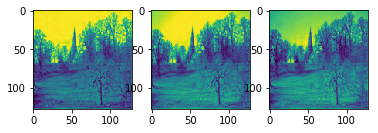

In [7]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(train["Y"][100][0])
axarr[1].imshow(train["Y"][100][1])
axarr[2].imshow(train["Y"][100][2])

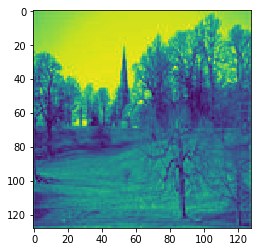

In [8]:
plt.imshow(train["X"][100][0])

## Preparing test dataset

In [9]:
test_files = glob("./data/images/test/*.jpg", recursive=True)
test_files.sort()

test = {}
test["X"] = np.array([cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in test_files])
test["Y"] = np.array([cv2.imread(f, cv2.IMREAD_COLOR) for f in test_files])

print(test["X"].shape)
print(test["Y"].shape)

(10000, 128, 128)
(10000, 128, 128, 3)


In [10]:
test["X"] = np.reshape(test["X"], [10000, 1, 128, 128])
test["Y"] = np.swapaxes(np.swapaxes(test["Y"], 2, 3), 1, 2)
print(test["X"].shape)
print(test["Y"].shape)

(10000, 1, 128, 128)
(10000, 3, 128, 128)


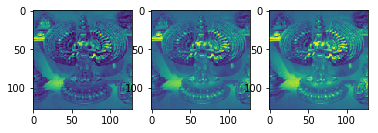

In [11]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(test["Y"][100][0])
axarr[1].imshow(test["Y"][100][1])
axarr[2].imshow(test["Y"][100][2])

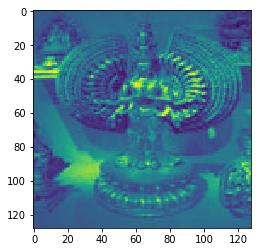

In [12]:
plt.imshow(test["X"][100][0])

## Writing getbatch function

In [13]:
def getbatch(X, Y, nsamples, batchsize = 1000):
    randstart = np.random.randint(0, nsamples - batchsize - 1)
    count = 0 
    while count < nsamples/batchsize:
        start = count*batchsize
        count += 1
        yield (X[randstart:randstart+batchsize], Y[randstart:randstart+batchsize])

In [14]:
nsamples = 100000

for batch_x, batch_y in getbatch(train["X"], train["Y"], nsamples):
    print(batch_x.shape, batch_y.shape)

(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
(1000, 1, 128, 128) (1000, 3, 128, 128)
